## The Problem

In [3]:
# Importing Python Modules

import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import math

In [3]:
# Defining constants of the problem

## Length of the Barrier
L = 1

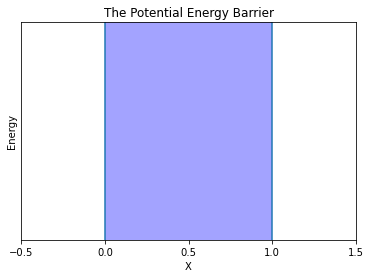

In [27]:
a = L
n_points = 100
fig, ax = plt.subplots()

ax.axvline(0, 0, 10,)
ax.axvline(a, 0, 10,)
ax.set_xticks([-L, -L/2, 0, L/2, L, 3*L/2])
ax.set_yticks([])
ax.set_ylim(0,1)
ax.set_xlim(-L/2,3*L/2)
ax.set_xlabel('X')
ax.set_ylabel('Energy')
ax.set_title('The Potential Energy Barrier')

y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)
x_points = np.linspace(0,L,n_points)
ax.fill_between(x_points, y_points_top, y_points_bot, facecolor = 'blue', alpha = .2)
ax.fill_between(x_points, y_points_top, y_points_bot, facecolor = 'blue', alpha = .2)

In [23]:
# Define function to calculate PIB wavefunction for a specified box dimension L, quantum number n, and position x

def tunneling_wfn(E, V0, L, x):
    m = 1
    hbar = 1
    
    A = 1
    B = 1
    C = 1
    F = 1
    
    k = np.sqrt(2 * m * E / hbar**2)
    K = np.sqrt(2 * m * (V0 - E) / hbar**2)
    
    def left_wfn(x_):
        return A * np.e**(1.0j*k*x_) + B * np.e**(-1.0j*k*x_)
    
    def right_wfn(x_):
        return C * np.e**(1.0j*k*x_)
        
    def barrier_wfn(x_):
        return F * np.e**(-K*x_)
    
    return np.piecewise(x, [x <= 0, ((x > 0) & (x < L)), x >= L], [lambda x : left_wfn(x), lambda x : barrier_wfn(x), lambda x : right_wfn(x)])


In [24]:
tunneling_wfn(0.5, 1, 1, 0.5)

array(0.60653066)

In [32]:
L = 1.0
V0 = 1.0

i_max = 500 #number of steps 
x_min = - L 
x_max = 2 * L
dx   = (x_max-x_min)/i_max #step size
x_points = np.linspace(x_min, x_max, i_max)

In [29]:
testing_psi = tunneling_wfn(0.5, 1.0, 1.0, x_points)

In [ ]:
a = L
n_points = 100
fig, ax = plt.subplots()

ax.axvline(0, 0, 10,)
ax.axvline(a, 0, 10,)
ax.set_xticks([-L, -L/2, 0, L/2, L, 3*L/2])
ax.set_yticks([])
ax.set_ylim(0,1)
ax.set_xlim(-L/2,3*L/2)
ax.set_xlabel('X')
ax.set_ylabel('Energy')
ax.set_title('The Potential Energy Barrier')

y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)
x_points = np.linspace(0,L,n_points)
ax.fill_between(x_points, y_points_top, y_points_bot, facecolor = 'blue', alpha = .2)
ax.fill_between(x_points, y_points_top, y_points_bot, facecolor = 'blue', alpha = .2)

ValueError: x and y must have same first dimension, but have shapes (500,) and (1,)

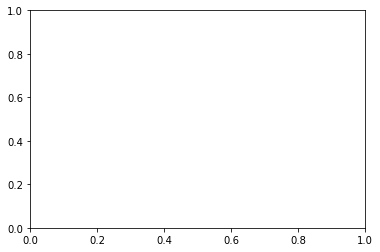

In [33]:
scale = .4  #scale of wavefunction, feel free to adjust this
fig, ax = plt.subplots()
ax.plot(x_points, V0, 'b')     #Plot potential

val_ordered = np.sort(val)     #Order eigenenergies by their magnitude
index = np.where(val == val_ordered[n-1])  #determine which wavefunction should be used

wvf = np.real(testing_psi)
ax.plot(x_points, (wvf[:,0,0])*scale+ val[index], 'g') #Plot wavefunction around its eigenenergy


ax.set_xlabel('Position (Bohr)')
ax.set_ylabel('Energy (Hartree)')
ax.set_title('Particle in a finite box and its wavefunction')
